<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/Linear_Mixed_Effects_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video de la práctica: https://www.youtube.com/watch?v=TSatpTisJ64

Otros:https://www.statsmodels.org/0.9.0/examples/notebooks/generated/mixed_lm_example.html

# Conjunto de datos de cerditos.

La variable de resultado es el peso de cada cerdo y la única variable predictiva es el "tiempo". Primero ajustamos un modelo que expresa el peso medio como una función lineal del tiempo, con una intersección aleatoria para cada cerdo. El modelo se especifica mediante fórmulas. Como no se especifica la estructura de efectos aleatorios, se utiliza automáticamente la estructura de efectos aleatorios predeterminada (una intersección aleatoria para cada grupo).

# Librerías

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import seaborn as sns

In [7]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [9]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [28]:
data.Pig = data.Pig.astype('object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pig     861 non-null    object 
 1   Evit    861 non-null    object 
 2   Cu      861 non-null    object 
 3   Litter  861 non-null    int64  
 4   Start   861 non-null    float64
 5   Weight  861 non-null    float64
 6   Feed    789 non-null    float64
 7   Time    861 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 53.9+ KB


In [30]:
data.describe()

,Litter,Start,Weight,Feed,Time
count,861.000000,861.000000,861.000000,789.000000,861.000000
mean,12.135889,25.672701,60.725769,80.728645,6.480836
std,7.427252,3.624336,24.978881,52.877736,3.444735
min,1.000000,15.000000,15.000000,3.300003,1.000000
25%,5.000000,23.799990,38.299990,32.800003,3.000000
50%,11.000000,25.700000,59.199980,74.499996,6.000000
75%,20.000000,27.299990,81.199950,123.000000,9.000000
max,24.000000,35.399990,117.000000,224.500000,12.000000


In [31]:
data.Pig.unique()

array([4601, 4602, 4603, 4605, 4641, 4643, 4645, 4756, 4757, 4759, 4760,
       4813, 4814, 4815, 4817, 4854, 4856, 4857, 4858, 5389, 5392, 5497,
       5500, 5501, 5502, 5524, 5527, 5528, 5578, 5581, 5582, 5850, 5851,
       5852, 5862, 5865, 5866, 6055, 6056, 6057, 6058, 6207, 6208, 6211,
       6284, 6287, 6288, 6430, 6432, 6433, 6909, 6910, 6912, 8049, 8050,
       8051, 8053, 8139, 8141, 8142, 8144, 8191, 8192, 8193, 8195, 8269,
       8270, 8271, 8273, 8437, 8439, 8442], dtype=object)

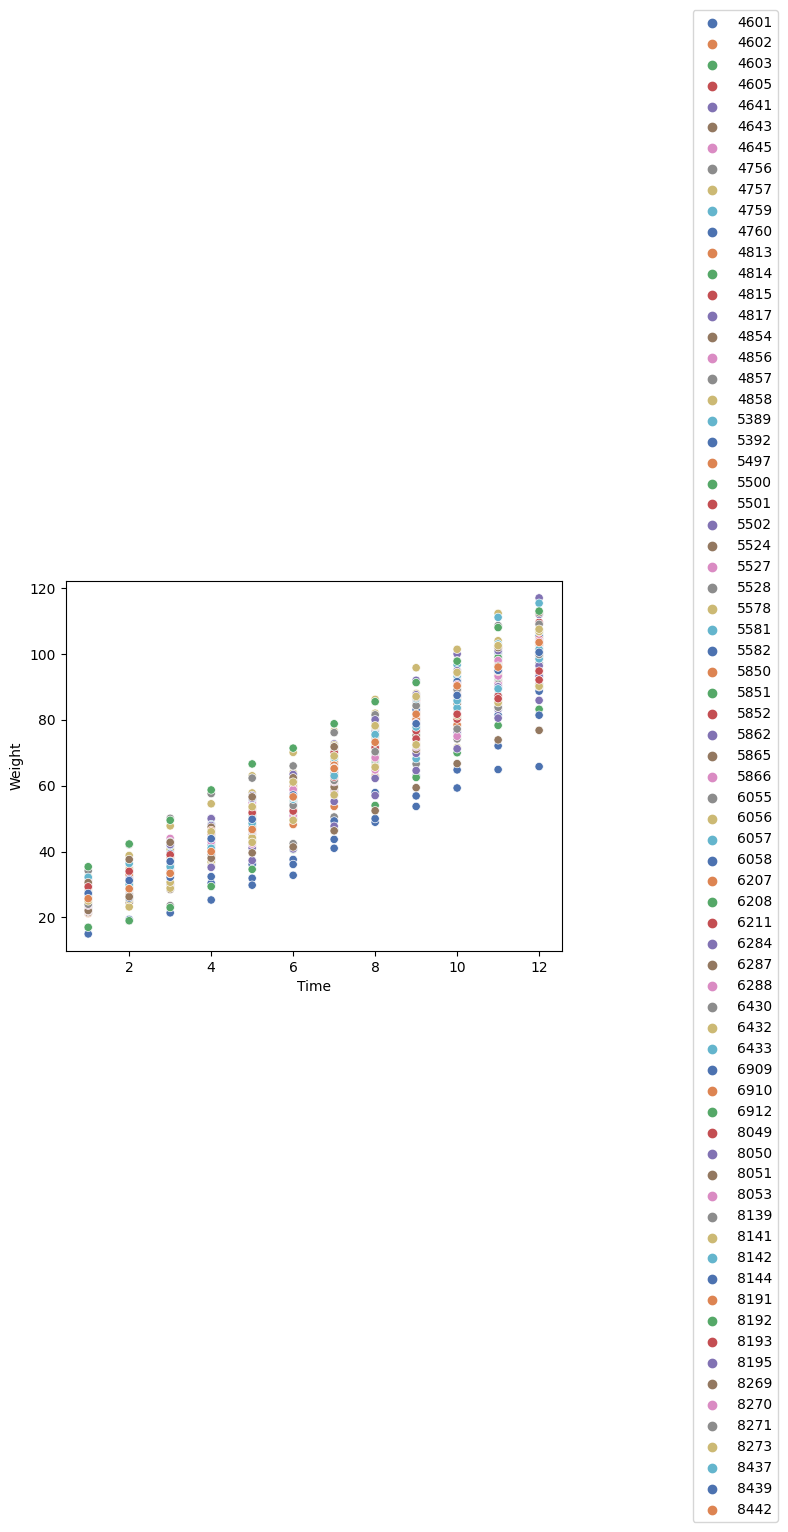

In [35]:
g = sns.scatterplot(data=data, x="Time", y="Weight", hue="Pig", palette="deep")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [11]:
model = smf.mixedlm("Weight ~ Time",data, groups=data["Pig"])
res = model.fit(method = ['lbfgs'])
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            
========================================================

"""

A continuación se ajusta un modelo con dos efectos aleatorios para cada animal: una intersección aleatoria y una pendiente aleatoria (con respecto al tiempo). Esto significa que cada cerdo puede tener un peso inicial diferente, además de crecer a un ritmo diferente. La fórmula especifica que "Tiempo" es una covariable con un coeficiente aleatorio. De forma predeterminada, las fórmulas siempre incluyen una intersección (que podría suprimirse aquí usando "0 + Tiempo" como fórmula).

In [14]:
model_2 = smf.mixedlm("Weight ~ Time", data , groups = data['Pig'] , re_formula = "~Time" )
#time has random coefficient
res_2 = model_2.fit(method =  ['lbfgs'] )
res_2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           
===========================================================

"""